# HW3: Occupation Dataset
# Tingyi Lu  804817032

### Introduction:

Special thanks to: https://github.com/guipsamora for sharing his datasets, materials, and questions.

- https://github.com/justmarkham for sharing the dataset and materials.


In [1]:
### Step 0a. Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Step 0b. Import the dataset from this address. https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
### Step 0c. Assign it to a variable called users and use the 'user_id' as index
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

In [3]:
# Step 1. See the first 5 entries
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [4]:
# Step 2. How many observations and columns are in the data?
print(users.shape)

(943, 4)


In [5]:
# Step 3. How many different occupations there are in this dataset?
len(users.loc[:,'occupation'].unique())

21

In [6]:
# Step 4. What is the most frequent occupation?
users.occupation.value_counts().idxmax()

'student'

In [7]:
# Step 5. Discover what is the mean age per occupation.
# Sort the results and find the 3 occupations with the lowest mean age and the 3 with the highest
users['age'].groupby(users['occupation']).mean().sort_values().head(3)

occupation
student          22.081633
none             26.555556
entertainment    29.222222
Name: age, dtype: float64

In [8]:
users['age'].groupby(users['occupation']).mean().sort_values().tail(3)

occupation
educator    42.010526
doctor      43.571429
retired     63.071429
Name: age, dtype: float64

In [9]:
# Step 6. Find the proportion of males by occupation and sort it from the most to the least
result = users[users['gender']=='M']['gender'].groupby(users['occupation']).count()/(users['gender'].groupby(users['occupation']).count())*100
result.sort_values(ascending = False)

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: gender, dtype: float64

In [10]:
# Step 7. For each occupation, calculate the minimum and maximum ages
# See groupby and agg() to perform multiple aggregate functions at once
users['age'].groupby(users['occupation']).agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [11]:
# Step 8. For each combination of occupation and gender, calculate the mean age.
# Arrange the results in a table so each row is an occupation, and you have a 
# column of the average male age and another column with the average female age.
# Sort the resulting table by Female mean age from least to greatest
users['age'].groupby([users['occupation'], users['gender']]).mean().unstack().sort_values(by = 'F')

gender,F,M
occupation,,
student,20.750000,22.669118
salesman,27.000000,38.555556
scientist,28.333333,36.321429
engineer,29.500000,36.600000
artist,30.307692,32.333333
entertainment,31.000000,29.000000
programmer,32.166667,33.216667
homemaker,34.166667,23.000000
other,35.472222,34.028986


In [12]:
# Step 9. For each occupation find the count of women and men
# Arrange the results in a table so each row is an occupation, similar to above
users['gender'].groupby([users['occupation'], users['gender']]).count().unstack()

gender,F,M
occupation,,
administrator,36.0,43.0
artist,13.0,15.0
doctor,NaN,7.0
educator,26.0,69.0
engineer,2.0,65.0
entertainment,2.0,16.0
executive,3.0,29.0
healthcare,11.0,5.0
homemaker,6.0,1.0


In [13]:
# Step 10. Turn the counts above into proportions. e.g administrator 0.455696 0.544304
# Arrange results in increasing order of proportion men
totalUsers = users['gender'].groupby(users['occupation']).count()
result = users['gender'].groupby([users['occupation'], users['gender']]).count()/totalUsers
step10 = result.unstack().sort_values(by = 'M')
step10

gender,F,M
occupation,,
homemaker,0.857143,0.142857
healthcare,0.687500,0.312500
librarian,0.568627,0.431373
artist,0.464286,0.535714
administrator,0.455696,0.544304
none,0.444444,0.555556
writer,0.422222,0.577778
marketing,0.384615,0.615385
other,0.342857,0.657143


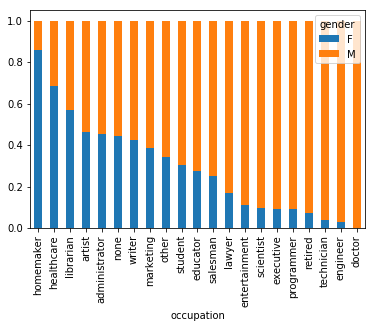

In [14]:
# Create a stacked barchart showing the results above
step10.plot.bar(stacked = True)

In [15]:
# Extract the first digit of each zip code 
# and create a new column called 'region' that maps the
# first digit of the zip to new values using this dictionary:
d = {'0': 'New England',
'1': 'Mid-Atlantic',
'2': 'Central East Coast',
'3': 'The South',
'4': 'Midwest',
'5': 'Northern Great Plains',
'6': 'Central Great Plains',
'7': 'Southern Central',
'8': 'Mountain Desert',
'9': 'West Coast'} 

# print the first 5 rows of the result

In [16]:
users['region'] = users.zip_code.str[0].map(d)
users.head()

,age,gender,occupation,zip_code,region
user_id,,,,,
1,24,M,technician,85711,Mountain Desert
2,53,F,other,94043,West Coast
3,23,M,writer,32067,The South
4,24,M,technician,43537,Midwest
5,33,F,other,15213,Mid-Atlantic


In [17]:
# for the occuptation 'retired', find the mean age of each region
users[users['occupation']=='retired']['age'].groupby(users['region']).mean()

region
Central East Coast       60.0
Central Great Plains     59.5
Mid-Atlantic             60.0
Midwest                  69.0
New England              65.0
Northern Great Plains    61.0
The South                73.0
West Coast               60.5
Name: age, dtype: float64